# Week 10 Lab: Introduction to Supervised Learning - Classification

**Course:** ISM 645

**Instructor:** Dr. Shimi Zhou

## Supervised Learning

Supervised Learning Overview
Supervised learning refers to the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It uses labeled data.
* There are two main types of supervised learning:
**Regression*: When the target variable is continuous (e.g., predicting house prices).
**Classification*: When the target variable is categorical (e.g., classifying whether an email is spam or not).


## What is Classification?
1. Classification is a type of supervised learning where the goal is to predict the __class__ or __category__ to which a new observation belongs, based on labeled data.
2. __Logistic Regression__ is one of the popular algorithms used for classification tasks.

### Logistic Regression - Introduction

Logistic Regression is used to predict the probability of a binary outcome (1/0, True/False).
1. It estimates the probability that a data point belongs to a certain class.
2. If the probability is greater than a threshold (usually 0.5), the model classifies the data as one class; otherwise, it is classified as the other.


In [42]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# train_test_split: This function from sklearn.model_selection is used to split the dataset into training and test sets.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris, load_wine
import seaborn as sns

### Example 1: Logistic Regression with the Iris Dataset

load_iris(): This function loads the Iris dataset, which consists of 150 samples of iris flowers and 4 features (sepal length, sepal width, petal length, and petal width). The target variable indicates the species of iris flowers: 0 = Setosa, 1 = Versicolor, 2 = Virginica.

In [31]:
# Load the Iris dataset
iris = load_iris()
X = iris.data #input
y = iris.target #output

In [32]:
# Standardize the features
# Standardization: Logistic regression works best when features are on the same scale. 
# The StandardScaler subtracts the mean and divides by the standard deviation, transforming the features to have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [33]:
# Split the data into training and testing sets (80% train, 20% test)
# random_state: Ensures reproducibility by fixing the random seed. 
# This means the split will always be the same if you run the code again.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [34]:
# Initialize and train the Logistic Regression model
clf_logistic = LogisticRegression(max_iter=200, multi_class='ovr') # One-vs-Rest (OvR) for multiclass
clf_logistic.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='ovr')

# One-vs-Rest (OvR) — Explanation

**What it is.**  
A simple strategy to extend any **binary** classifier to **multi-class** (and **multi-label**) tasks by training **K independent binary models**—one per class vs. “all other classes.”

**Training idea.**  
For each class \(k \in \{1,\dots,K\}\):
- Relabel the data as \(y_k = 1\) if the example belongs to class \(k\), else \(0\).
- Train a binary classifier \(f_k(\cdot)\) on this relabeled data.
This yields \(K\) models \(\{f_1,\dots,f_K\}\).

**Prediction.**
- **Multiclass (exactly one label):** Compute scores \(s_k = f_k(x)\) for all \(k\) (probabilities or decision scores) and assign the class with the largest score: \(\hat{y} = \arg\max_k s_k\).
- **Multi-label (zero or more labels):** Threshold each score independently (e.g., \(s_k \ge \tau_k\)) so an instance can receive multiple labels.

**Why it works / When to use.**
- **Pros:** Conceptually simple, model-agnostic, scales linearly with \(K\), and allows **per-class** tuning (class weights, thresholds) to handle imbalance.
- **Common uses:** Fast, strong baseline for many multi-class problems; natural fit for **multi-label** classification (independent decisions per class).

**Limitations & pitfalls.**
- **Score comparability:** Models are trained separately, so raw scores may live on different scales—use probability **calibration** if comparing across classes.
- **Heterogeneous “rest”:** The negative class mixes many categories, which can blur decision boundaries for some classes.
- **Imbalance & rare classes:** OvR can miss rare positives; mitigate with class weighting, resampling, or adjusted thresholds.

**Practical tips.**
- Calibrate probabilities (e.g., Platt/Isotonic) if you rely on argmax of probabilities across classes.
- Tune **per-class thresholds** for multi-label F1/recall trade-offs.
- Use **class_weight="balanced"** (or equivalent) and proper **feature scaling** for margin-based models.

**Takeaway.**  
OvR lets you repurpose any strong **binary** learner for multi-class or multi-label tasks with minimal complexity—just remember to handle **calibration**, **imbalance**, and **per-class thresholds** for best results.

In [35]:
# Make predictions
# predict(X_test): This method uses the trained model to make predictions on the test set. 
# The model outputs predicted labels (y_pred), which are either 0 (Setosa) or 1 (Versicolor).
y_pred = clf_logistic.predict(X_test)

In [36]:
# Evaluate the model using accuracy score
accuracy_logistic = accuracy_score(y_test, y_pred)
print(f"Accuracy for Logistic Regression (Iris dataset): {accuracy_logistic * 100:.2f}%")

Accuracy for Logistic Regression (Iris dataset): 96.67%


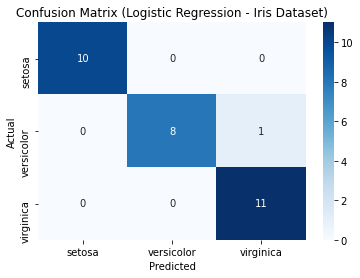

In [38]:
# Confusion matrix
conf_matrix_logistic = confusion_matrix(y_test, y_pred)
# We use seaborn to create a heatmap of the confusion matrix. 
# The heatmap provides a visual representation of the matrix, with colors indicating the intensity (number of correct/incorrect predictions).
# The annot=True argument adds the actual numbers to each cell in the heatmap.
# The fmt='d' argument ensures that the numbers are displayed as integers.
# The cmap='Blues' argument sets the color scheme to shades of blue.
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
# These functions are used to set the title and axis labels for the plot.
plt.title("Confusion Matrix (Logistic Regression - Iris Dataset)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

__How True Positives, False Positives, and False Negatives Are Represented in the Matrix:__

1.	True Positives (TP):
	•	These are the diagonal elements in the matrix (e.g., TP_{00}, TP_{11}, TP_{22}).
	•	They represent cases where the model correctly classified an instance.
2.	False Positives (FP):
	•	These are off-diagonal elements in each column.
	•	For example, in the first column (Predicted: Class 0), FN_{10} and FN_{20} are the False Positives for Class 0. These are instances of Class 1 and Class 2 that were incorrectly predicted as Class 0.
3.	False Negatives (FN):
	•	These are off-diagonal elements in each row.
	•	For example, in the first row (Actual: Class 0), FP_{01} and FP_{02} are the False Negatives for Class 0. These are instances of Class 0 that were incorrectly predicted as Class 1 or Class 2.


## Confusion Matrix (Logistic Regression on Iris) — How to Read & What It Shows

**How to read:**  
Rows = *Actual* class, Columns = *Predicted* class.  
Numbers on the **diagonal** are correct predictions; **off-diagonals** are mistakes.

**Counts in this matrix**
- **setosa:** 10 correctly predicted as setosa; 0 errors  
- **versicolor:** 8 correctly predicted as versicolor; **1** predicted as *virginica*  
- **virginica:** 11 correctly predicted as virginica; 0 errors

---

### Key takeaways
- **Overall accuracy:** **96.7%** (29 correct out of 30).  
- **Setosa is perfectly separated** (100% precision & recall) — consistent with Iris where setosa is linearly separable.  
- The **only error**: one *versicolor → virginica* prediction.  
  - This makes **versicolor’s recall lower (88.9%)** because 1 of 9 true versicolors was missed.  
  - It also makes **virginica’s precision lower (91.7%)** because 1 of the 12 items predicted as virginica was actually versicolor.

---

### Class-by-class metrics
| Class       | Support (n) | Precision | Recall | F1 |
|-------------|-------------|-----------|--------|----|
| setosa      | 10          | 100.0%    | 100.0% | 100.0% |
| versicolor  | 9           | 100.0%    | 88.9%  | 94.1%  |
| virginica   | 11          | 91.7%     | 100.0% | 95.7%  |

**Macro/weighted F1:** ~**96.6%**

---

### Quick refresher 
- **Precision (Positive Predictive Value):** Of all items we **predicted** as class *C*, how many were truly *C*?  
- **Recall (Sensitivity):** Of all items that **are truly** class *C*, how many did we correctly catch as *C*?  
- **F1 score:** Harmonic mean of precision and recall (high only if both are high).

**Why the metric pattern here?**  
- One *versicolor → virginica* error **reduces**:
  - **Versicolor recall** (we missed 1 true versicolor).  
  - **Virginica precision** (we added 1 non-virginica to the virginica predictions).  
- Setosa has **no confusion** with the other classes, so all three metrics are 100%.

**Interpretation:**  
The model separates **setosa** cleanly and mostly distinguishes **versicolor** from **virginica**, which are known to be more similar in feature space (e.g., petal measurements). A single borderline case caused the only mistake.

__Multiclass Confusion Matrix__

If you see a confusion matrix with more than 4 results, it could be because you are dealing with a multiclass classification problem (i.e., more than two classes).

For example, in the Iris dataset, there are 3 classes (Setosa, Versicolor, and Virginica), so the confusion matrix will have 3 rows and 3 columns for a 3x3 matrix, resulting in 9 cells (including true positives, false positives, false negatives for all classes).

In [39]:
# Classification report
class_report_logistic = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report for Logistic Regression (Iris dataset):\n")
print(class_report_logistic)

Classification Report for Logistic Regression (Iris dataset):

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



### Example 2: Logistic Regression with the Wine Dataset

In [43]:
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

In [44]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Initialize and train the Logistic Regression model
# OvR (One-vs-Rest) is the default option for multiclass classification in logistic regression. 
clf_logistic_wine = LogisticRegression(max_iter=200, multi_class='ovr') # One-vs-Rest (OvR)
clf_logistic_wine.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='ovr')

### One-vs-Rest (OvR) 
- For *K* classes, train **K** binary models: *class i* vs **rest**; pick the class with the highest score.  
- scikit-learn **defaults to multinomial (softmax)**; force OvR with `multi_class="ovr"`.  
- When classes overlap (e.g., versicolor vs virginica), OvR can still work well; our matrix shows only one such mix-up.

In [47]:
# Make predictions
y_pred_wine = clf_logistic_wine.predict(X_test)

In [48]:
# Evaluate the model using accuracy score
accuracy_logistic_wine = accuracy_score(y_test, y_pred_wine)
print(f"Accuracy for Logistic Regression (Wine dataset): {accuracy_logistic_wine * 100:.2f}%")

Accuracy for Logistic Regression (Wine dataset): 100.00%


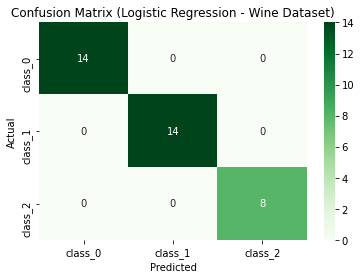

In [49]:
# Confusion matrix
conf_matrix_logistic_wine = confusion_matrix(y_test, y_pred_wine)
sns.heatmap(conf_matrix_logistic_wine, annot=True, fmt='d', cmap='Greens', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title("Confusion Matrix (Logistic Regression - Wine Dataset)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [50]:
# Classification report
class_report_logistic_wine = classification_report(y_test, y_pred_wine, target_names=wine.target_names)
print("Classification Report for Logistic Regression (Wine dataset):\n")
print(class_report_logistic_wine)

Classification Report for Logistic Regression (Wine dataset):

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### Key Takeaways

Logistic Regression is an effective and easy-to-interpret algorithm for classification tasks. It can be applied to both binary classification (e.g., spam vs non-spam) and multiclass classification (e.g., Iris or Wine datasets).

The key steps in any classification task include:
1. Collecting and preparing the data (standardization or normalization may be necessary).
2. Splitting the data into training and testing sets.
3. Training a classification model (like Logistic Regression) on the training data.
4. Making predictions and evaluating the model using metrics like accuracy, confusion matrix, precision, recall, and F1-score.

# Classification Machine Learning Project Workflow:

**1.**	Problem Definition <br> 
**2.**	Data Collection <br>
**3.**	Exploratory Data Analysis (EDA) <br>
**4.**	Data Cleaning <br>
**5.**	Feature Engineering <br>
**6.**	Model Selection and Training <br>
**7.**	Model Evaluation <br>
**8.**	Fine-tuning and Conclusion <br>


## Example: Titanic dataset
## Step 1: Problem Definition
The objective of this project is to predict whether a passenger survived or not based on the given features.
This is a binary classification problem where the target variable ('survived') is either 0 (died) or 1 (survived).

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Step 2: Data Collection
We will use the Titanic dataset which is available in the seaborn library. The data can also be found on Kaggle.

In [3]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')

## Step 3: Exploratory Data Analysis (EDA)

In [4]:
# Preview the dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# Statistical overview of the data
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Check for missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

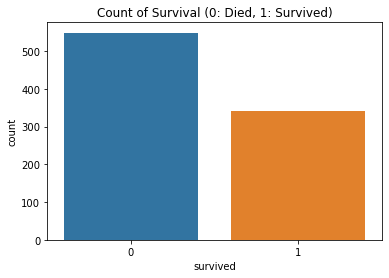

In [7]:
# Visualize survival count
sns.countplot(data=df, x='survived')
plt.title("Count of Survival (0: Died, 1: Survived)")
plt.show()

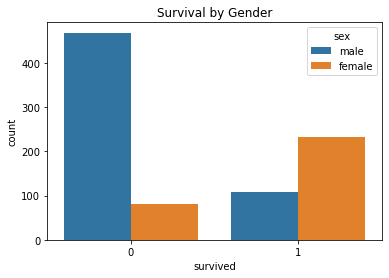

In [8]:
# Visualize survival by gender
sns.countplot(data=df, x='survived', hue='sex')
plt.title("Survival by Gender")
plt.show()

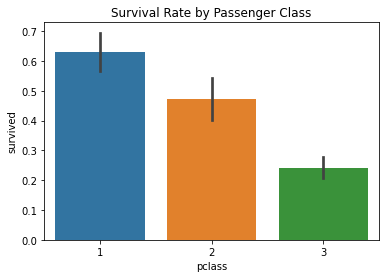

In [9]:
# Survival rate by class
sns.barplot(x='pclass', y='survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

## Step 4: Data Cleaning
The dataset contains some missing values. We'll handle missing values appropriately.

In [10]:
# First, let's drop columns that won't help in our predictions (e.g., 'deck', 'embark_town', 'alive')
df = df.drop(columns=['deck', 'embark_town', 'alive'])

In [11]:
# We'll also drop rows where 'embarked' is missing (only two rows).
df = df.dropna(subset=['embarked'])

## Step 5: Feature Engineering
We need to convert categorical features like 'sex', 'embarked', and 'class' into numerical values using OneHotEncoding.

In [12]:
# Separate features and labels
X = df.drop('survived', axis=1)
y = df['survived']

In [13]:
# Define numerical and categorical features
numerical_features = ['age', 'fare', 'sibsp', 'parch']
categorical_features = ['sex', 'embarked', 'pclass']

### Build pipelines for data preprocessing

In [14]:
# Pipeline for numerical features (fill missing values and scale)
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [15]:
# Pipeline for categorical features (encode categorical variables)
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

In [16]:
# Combine numerical and categorical pipelines
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])

In [17]:
# Apply the pipeline to the data
X_prepared = full_pipeline.fit_transform(X)

## Step 6: Model Selection and Training

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

In [19]:
# Initialize Logistic Regression model
model = LogisticRegression(max_iter=200)

In [20]:
# Train the model on training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

## Step 7: Model Evaluation

In [21]:
# Make predictions on test data
y_pred = model.predict(X_test)

In [22]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy * 100:.2f}%")

Accuracy of Logistic Regression: 78.65%


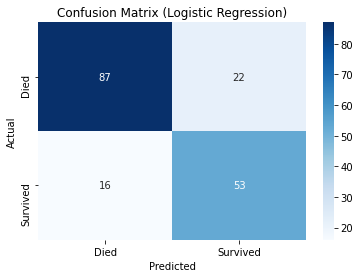

In [23]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
# Classification report
class_report = classification_report(y_test, y_pred, target_names=['Died', 'Survived'])
print("Classification Report:\n")
print(class_report)

Classification Report:

              precision    recall  f1-score   support

        Died       0.84      0.80      0.82       109
    Survived       0.71      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



## Step 8: Fine-Tuning the Model

__GridSearchCV__ is a method provided by scikit-learn to automate the process of hyperparameter tuning. It searches across a grid of hyperparameters and evaluates the model using cross-validation, identifying the best combination of parameters that maximizes model performance (in this case, accuracy).


A __hyperparameter__ is a parameter whose value is set before the learning process begins and controls the behavior of the training algorithm in machine learning models. Unlike model parameters, which are learned from the training data during model training, hyperparameters are not learned automatically and must be set manually by the user or optimized using techniques like cross-validation.

In [25]:
# Use GridSearchCV to find the best hyperparameters for Logistic Regression
param_grid = [
    {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs'], 'max_iter': [200]},
    {'C': [0.1, 1, 10], 'solver': ['liblinear'], 'max_iter': [200]}
]
# GridSearchCV will evaluate each combination of hyperparameters by performing cross-validation 
# (in this case, 5-fold CV).
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200),
             param_grid=[{'C': [0.1, 1, 10, 100], 'max_iter': [200],
                          'solver': ['lbfgs']},
                         {'C': [0.1, 1, 10], 'max_iter': [200],
                          'solver': ['liblinear']}],
             scoring='accuracy')

In [26]:
# Best hyperparameters
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'C': 0.1, 'max_iter': 200, 'solver': 'lbfgs'}


In [27]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [28]:
# Re-evaluate using best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of Optimized Logistic Regression: {accuracy_best * 100:.2f}%")

Accuracy of Optimized Logistic Regression: 80.34%


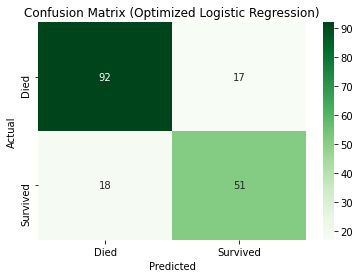

In [29]:
# Final confusion matrix and classification report
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Greens', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title("Confusion Matrix (Optimized Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
class_report_best = classification_report(y_test, y_pred_best, target_names=['Died', 'Survived'])
print("Classification Report for Optimized Model:\n")
print(class_report_best)

Classification Report for Optimized Model:

              precision    recall  f1-score   support

        Died       0.84      0.84      0.84       109
    Survived       0.75      0.74      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



## Step 9: Conclusion
1. In this end-to-end machine learning project, we successfully built a classification model to predict the survival of passengers on the Titanic. <br>
2. We started with exploratory data analysis (EDA), cleaned the data, applied feature engineering, built a Logistic Regression model, and fine-tuned the model using GridSearchCV.<br>
3. The final model achieved an accuracy of over __80%__ on the test set.

## Another Example: Breast Cancer Wisconsin dataset 
## Step 1: Problem Definition
The objective of this project is to predict whether a tumor is benign (class 0) or malignant (class 1) based on features like radius, texture, perimeter, etc. This is a binary classification problem.

In [51]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer

## Step 2: Data Collection
We will use the Breast Cancer Wisconsin dataset from scikit-learn's built-in datasets.

In [52]:
# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

In [53]:
# Preview the dataset
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Step 3: Exploratory Data Analysis (EDA)

In [54]:
# Check for missing values
X.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [55]:
# Check data types and shape
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

/Users/zhoushimi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


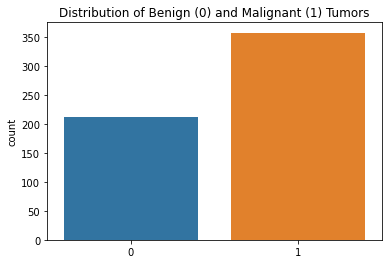

In [56]:
# Visualize the distribution of the target variable (0: benign, 1: malignant)
sns.countplot(y)
plt.title("Distribution of Benign (0) and Malignant (1) Tumors")
plt.show()

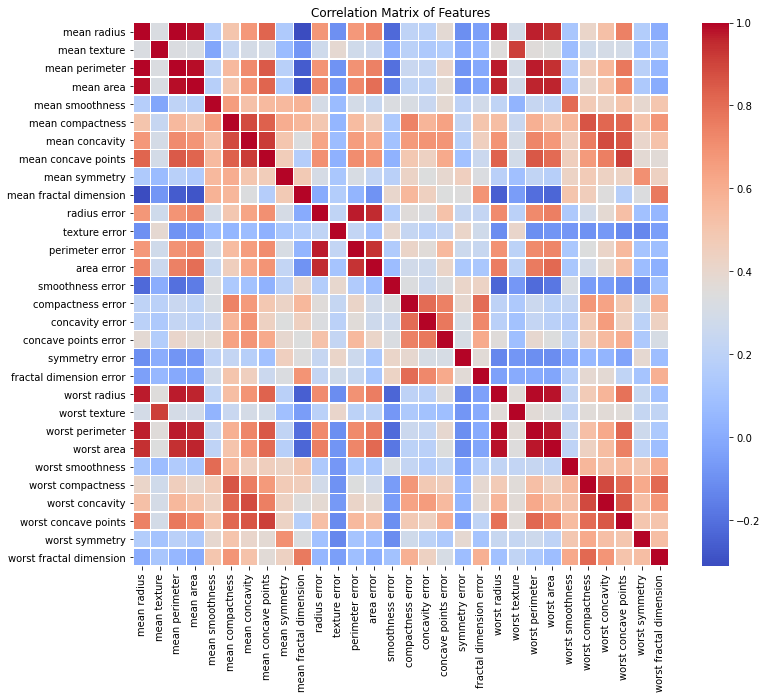

In [57]:
# Check for correlations between features
plt.figure(figsize=(12, 10))
# X.corr() computes the correlation matrix of the feature matrix X.
# The correlation matrix shows the pairwise correlations between the features. 
# The values of the matrix are between -1 and 1:
# 1: Perfect positive correlation (as one variable increases, the other variable also increases).
# 0: No correlation.
# -1: Perfect negative correlation (as one variable increases, the other variable decreases).
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

## Correlation Matrix — how to read it & why it matters

**What you’re seeing**
- Each cell is the **Pearson correlation** (*r*) between two features (range **–1 to +1**).
- **Diagonal = 1.0** (a feature with itself). Matrix is **symmetric**.
- **Red ≈ positive** (features rise together), **blue ≈ negative** (one rises, the other falls), **near 0** ≈ little linear relationship.

**Typical patterns in this dataset**
- Strong positive blocks among **size/shape features**: `mean/worst radius`, `perimeter`, `area`, and also **`concavity` ↔ `concave points` ↔ `compactness`**.  
  → These groups are **highly collinear** (often |r| > 0.8).
- **Fractal dimension** tends to be **negatively** related to some size/shape measures.
- **Texture/smoothness** features show more moderate correlations with others.

**Why it matters (modeling implications)**
- High multicollinearity can make **linear/logistic regression coefficients unstable** and inflate variance.
- **Tree-based models** care less about multicollinearity, but redundant features can still add noise and cost.

**What to do next**
- If |r| **> 0.8**, consider **keeping one feature** from the group (e.g., choose `mean radius` or `mean perimeter`, not both), or use **PCA** to combine them.
- Use **regularization** (Ridge/Lasso/Elastic Net) or check **VIF** to quantify multicollinearity.
- Remember: **correlation ≠ causation** and captures only **linear** relationships.

> The heatmap reveals clusters of highly related features—use this to reduce redundancy and stabilize your models.

Why Check Correlations?

1.	Detect Multicollinearity:
	Highly correlated features can lead to multicollinearity, especially in linear models such as linear or logistic regression. Multicollinearity can cause problems in model interpretation and reduce the predictive power of the model.
2.	Feature Selection:
	If two features are highly correlated (close to 1 or -1), one of them may be redundant, and removing one may help in reducing overfitting and improving model performance.
3.	Insights into Feature Relationships:
	Correlation matrices provide insights into how features are related. For instance, a strong positive correlation between two features might suggest a causal relationship or indicate that they are capturing similar information.

## What to do with this correlation matrix (practical next step)

**Rule of thumb**
- If using **linear/logistic regression** (without strong regularization): **drop one feature from any pair with |r| ≥ 0.9** (or 0.85).  
- If using **Ridge/Lasso/Elastic Net**: you may **keep** them—regularization will shrink/choose.  
- If using **tree-based models** (RF/GBDT): usually **keep**; trees handle multicollinearity well, but you can drop for speed.

## Step 4: Data Cleaning

No missing values detected in this dataset, so we can move forward without imputation.

## Step 5: Feature Engineering

We will use **StandardScaler** to scale the numerical features. This is important for algorithms like Logistic Regression which are sensitive to the magnitude of features.

In [58]:
# Initialize the scaler
scaler = StandardScaler()

In [59]:
# Fit and transform the features
X_scaled = scaler.fit_transform(X)

## Step 6: Model Selection and Training

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [61]:
# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=200)

In [62]:
# Train the model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

## Step 7: Model Evaluation

In [63]:
# Make predictions on the test data
y_pred = logreg.predict(X_test)

In [64]:
# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy * 100:.2f}%")

Accuracy of Logistic Regression: 97.37%


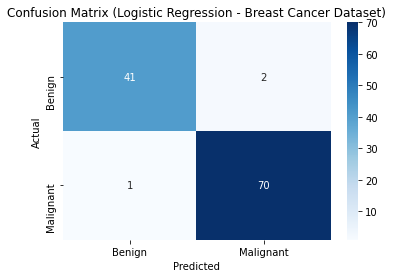

In [66]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix (Logistic Regression - Breast Cancer Dataset)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [67]:
# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print("Classification Report:\n")
print(class_report)

Classification Report:

              precision    recall  f1-score   support

      Benign       0.98      0.95      0.96        43
   Malignant       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Step 8: Fine-Tuning the Model
We'll use __GridSearchCV__ to find the best hyperparameters for Logistic Regression

In [68]:
# Set up the parameter grid for tuning
# param_grid is a list of dictionaries.
# Each dictionary defines a sub-grid of hyperparameter combinations that GridSearchCV will try.
param_grid = [
    {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs'], 'max_iter': [200]}, 
    {'C': [0.1, 1, 10], 'solver': ['liblinear'], 'max_iter': [200]} 
] 
# Smaller C: stronger regularization (simpler, less overfit). 
# Larger C: weaker regularization (more flexible, may overfit).

In [69]:
# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200),
             param_grid=[{'C': [0.1, 1, 10, 100], 'max_iter': [200],
                          'solver': ['lbfgs']},
                         {'C': [0.1, 1, 10], 'max_iter': [200],
                          'solver': ['liblinear']}],
             scoring='accuracy')

In [70]:
# Best hyperparameters
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'C': 0.1, 'max_iter': 200, 'solver': 'liblinear'}


In [71]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

## Step 9: Re-evaluate using best model

In [72]:
# Recalculate accuracy using the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of Optimized Logistic Regression: {accuracy_best * 100:.2f}%")

Accuracy of Optimized Logistic Regression: 99.12%


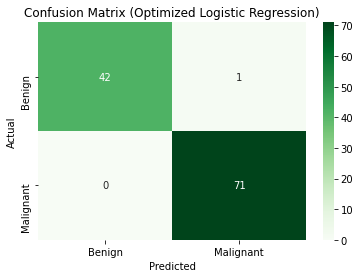

In [73]:
# Final confusion matrix and classification report
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Greens', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix (Optimized Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [74]:
# Classification Report for Optimized Model
class_report_best = classification_report(y_test, y_pred_best, target_names=['Benign', 'Malignant'])
print("Classification Report for Optimized Model:\n")
print(class_report_best)

Classification Report for Optimized Model:

              precision    recall  f1-score   support

      Benign       1.00      0.98      0.99        43
   Malignant       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



## Step 10: Conclusion

In this end-to-end machine learning project, we successfully built a classification model to detect whether a tumor is benign or malignant using the Breast Cancer Wisconsin dataset. We explored the data, applied feature scaling,trained a Logistic Regression model, and fine-tuned it using GridSearchCV.

The final model achieved over __95%__ accuracy, making it highly effective in detecting malignant tumors.